# Exercice Calcul des dérivés cours n°2

## Liste des imports

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs #génération de données
from sklearn.metrics import accuracy_score #comparaison entre 2 lots de données

## Génération des données

dimension de X: (100, 2)
dimension de y: (100, 1)


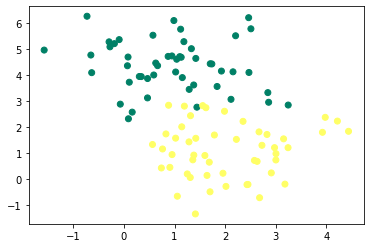

In [58]:
# X contient 2 paramètres (largeur et longueur des feuilles par ex)
X,y = make_blobs(n_samples=100,n_features=2,centers=2,random_state=0)
#on redimensionne y car c'est une colonne (état 0 ou 1)
y = y.reshape((y.shape[0],1))

#Info sur les dims pour vérifier que cela correspond bien
print('dimension de X:',X.shape)
print('dimension de y:',y.shape) 

plt.scatter(X[:,0],X[:,1],c=y,cmap='summer')       
plt.show()

## Initialisation et création des fonctions

In [59]:
def initialisation(X):
    W = np.random.randn(X.shape[1],1)
    b = np.random.randn(1)
    return (W,b)

In [60]:
def model(X,W,b):
    #z est le modèle/critère
    Z = X.dot(W) + b #fonction dot pour multiplier 2 matrice
    A = 1 /(1+np.exp(-Z)) # A est la fonction d'activation
    return A

In [61]:
def log_loss(A,y): #c'est la fonction coût
    return 1/len(y)*np.sum(-y*np.log(A)-(1-y)*np.log(1-A))

In [62]:
def gradients(A,x,y):
    dW = 1/len(y)*np.dot(X.T,A-y) #jacobien de W, X.T est la transposée de X
    db = 1/len(y)*np.sum(A-y)
    return (dW,db)

In [63]:
def update(dW,db,W,b,learning_rate): #implémentation de la méthode du gradient
    W = W - learning_rate*dW
    b = b - learning_rate*db
    return (W,b)

In [74]:
def predict(X,W,b): #décision vrai ou fausse
    A = model(X,W,b)
    print(A) #impression de la proba
    return  A>=0.5

## Création d'un neurone

In [67]:
def artificial_neuron(X,y,learning_rate=0.1,n_iter=100):
    
    #initialisation de W et b
    W,b = initialisation(X)
    
    loss = [] #pour visualiser l'évolution du coût
    
    for i in range(n_iter):
        A = model(X,W,b)
        loss.append(log_loss(A,y))
        dW,db = gradients(A,X,y)
        W,b = update(dW,db,W,b,learning_rate)
        
    y_pred = predict(X,W,b)
    print(accuracy_score(y,y_pred))
    
    plt.plot(loss)
    plt.show()
    
    return (W,b)

0.88


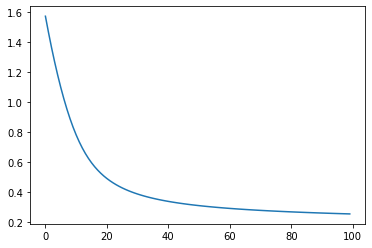

In [68]:
W,b = artificial_neuron(X,y)

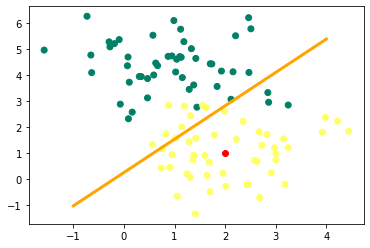

[0.8430329]


array([ True])

In [77]:
new_plant = np.array([2,1])

#tracer la frontière 
x0 = np.linspace(-1,4,100)
x1 = (-W[0]*x0-b)/W[1]

plt.scatter(X[:,0],X[:,1],c=y,cmap='summer') 
plt.scatter(new_plant[0],new_plant[1],c='r')
plt.plot(x0,x1,c='orange',lw=3)
plt.show()
predict(new_plant,W,b)